In [ ]:
import os

# Define the paths
base_path = '/kaggle/input/vehicle-detection-image-set/data/'
train_path = '/kaggle/working/dataset/train/'
test_path = '/kaggle/working/dataset/test/'

# Create the folders
os.makedirs(train_path + 'vehicles', exist_ok=True)
os.makedirs(train_path + 'non-vehicles', exist_ok=True)
os.makedirs(test_path + 'vehicles', exist_ok=True)
os.makedirs(test_path + 'non-vehicles', exist_ok=True)

In [3]:
import shutil

# Define the source and destination paths
src_vehicles_path = base_path + 'vehicles/'
src_non_vehicles_path = base_path + 'non-vehicles/'

dest_train_vehicles_path = train_path + 'vehicles/'
dest_train_non_vehicles_path = train_path + 'non-vehicles/'
dest_test_vehicles_path = test_path + 'vehicles/'
dest_test_non_vehicles_path = test_path + 'non-vehicles/'

#split the data into 80% for training and 20% for testing
split_ratio = 0.8

# List all vehicle and non-vehicle images
vehicle_images = os.listdir(src_vehicles_path)
non_vehicle_images = os.listdir(src_non_vehicles_path)

# Calculate the number of images for training and testing
num_train_vehicles = int(len(vehicle_images) * split_ratio)
num_train_non_vehicles = int(len(non_vehicle_images) * split_ratio)

# Copy images to the training folders
for img in vehicle_images[:num_train_vehicles]:
    shutil.copy(src_vehicles_path + img, dest_train_vehicles_path + img)

for img in non_vehicle_images[:num_train_non_vehicles]:
    shutil.copy(src_non_vehicles_path + img, dest_train_non_vehicles_path + img)

# Copy the remaining images to the testing folders
for img in vehicle_images[num_train_vehicles:]:
    shutil.copy(src_vehicles_path + img, dest_test_vehicles_path + img)

for img in non_vehicle_images[num_train_non_vehicles:]:
    shutil.copy(src_non_vehicles_path + img, dest_test_non_vehicles_path + img)

## Importing all Dependencies

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import Precision, Recall, F1Score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.applications import  MobileNetV2
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras import models, layers

Dataset Link -> https://www.kaggle.com/datasets/brsdincer/vehicle-detection-image-set/data

## Data Collection and Preprocessing

In [5]:
Batch_size1 = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5], 
    channel_shift_range=50  
)

test_datagen = ImageDataGenerator(rescale=1./255
)

test_Image = test_datagen.flow_from_directory(
    '/kaggle/working/dataset/test',
    target_size=(64, 64),
    batch_size=Batch_size1,
    class_mode='binary',
    shuffle=False 
)

train_Image = train_datagen.flow_from_directory(
    '/kaggle/working/dataset/train',
    target_size=(64, 64),
    batch_size=Batch_size1,
    class_mode='binary'
)

Found 3553 images belonging to 2 classes.
Found 14207 images belonging to 2 classes.


## Model

In [8]:
cnn_model = Sequential()


cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(64, 64, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='Same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='Same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))


cnn_model.add(Flatten())


cnn_model.add(Dense(512, activation="relu"))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(256, activation="relu"))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(64, activation="relu"))
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(1, activation="sigmoid"))

early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=1)

optimizer = Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(),Recall()])

In [9]:

Evaluate1 = cnn_model.fit(train_Image, epochs=10, validation_data=test_Image, batch_size=Batch_size1, callbacks=[early_stopping])

Epoch 1/10
444/444 [==============================] - 185s 410ms/step - loss: 0.3861 - accuracy: 0.8237 - precision_1: 0.7973 - recall_1: 0.8634 - val_loss: 0.1572 - val_accuracy: 0.9451 - val_precision_1: 0.9408 - val_recall_1: 0.9488
Epoch 2/10
444/444 [==============================] - 183s 412ms/step - loss: 0.1936 - accuracy: 0.9257 - precision_1: 0.9263 - recall_1: 0.9235 - val_loss: 0.1140 - val_accuracy: 0.9567 - val_precision_1: 0.9257 - val_recall_1: 0.9920
Epoch 3/10
444/444 [==============================] - 183s 412ms/step - loss: 0.1272 - accuracy: 0.9524 - precision_1: 0.9548 - recall_1: 0.9488 - val_loss: 0.0540 - val_accuracy: 0.9834 - val_precision_1: 0.9733 - val_recall_1: 0.9937
Epoch 4/10
444/444 [==============================] - 182s 410ms/step - loss: 0.1029 - accuracy: 0.9626 - precision_1: 0.9652 - recall_1: 0.9589 - val_loss: 0.0402 - val_accuracy: 0.9859 - val_precision_1: 0.9809 - val_recall_1: 0.9909
Epoch 5/10
444/444 [==============================] - 18

In [10]:
print("\nClassification Report:")
score, acc, pre, rcl = cnn_model.evaluate(test_Image)
print('Test Loss:', score * 100)
print('Test Accuracy:' ,acc * 100)
print('Test Precision:',pre * 100)
print('Test Recall:', rcl * 100)
f1_score=2 * (pre * rcl) / (rcl + rcl)
print('Test F1-Score:' ,f1_score * 100)


Classification Report:
112/112 [==============================] - 9s 83ms/step - loss: 0.0438 - accuracy: 0.9831 - precision_1: 0.9706 - recall_1: 0.9960
Test Loss: 4.381135106086731
Test Accuracy: 98.31128716468811
Test Precision: 97.06371426582336
Test Recall: 99.6020495891571
Test F1-Score: 97.06371426582336


112/112 [==============================] - 10s 84ms/step


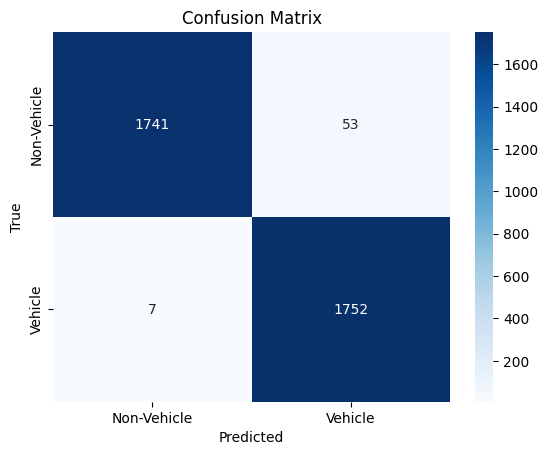

In [11]:

predictions = cnn_model.predict(test_Image)


binary_predictions = np.round(predictions)


true_labels = test_Image.classes


conf_matrix = confusion_matrix(true_labels, binary_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Vehicle', 'Vehicle'], yticklabels=['Non-Vehicle', 'Vehicle'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

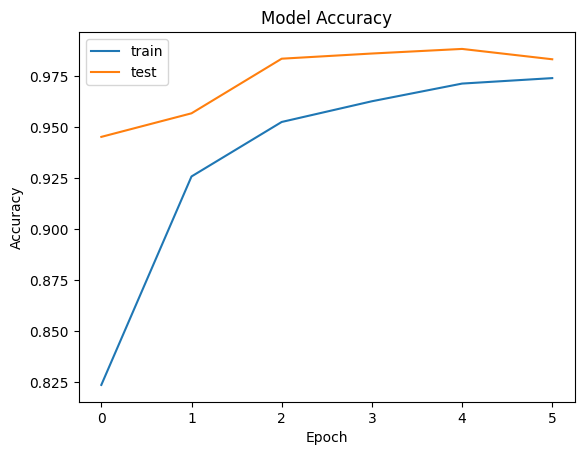

In [14]:

plt.plot(Evaluate1.history[k])
plt.plot(Evaluate1.history['val_'+k])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()





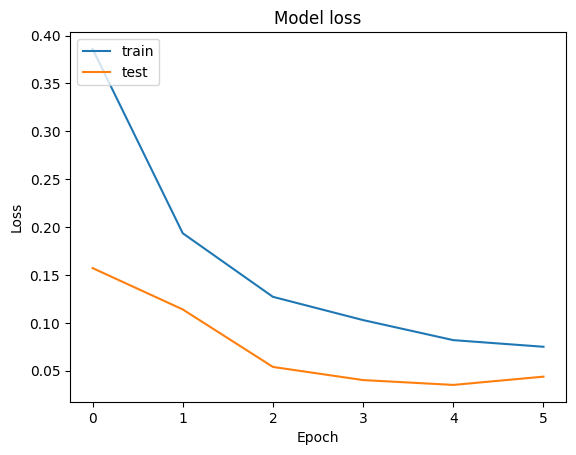

In [13]:
plt.plot(Evaluate1.history['loss'])
plt.plot(Evaluate1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


112/112 [==============================] - 9s 83ms/step


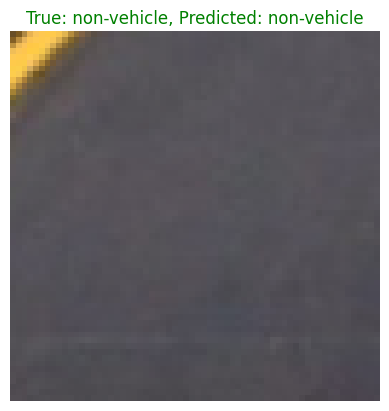

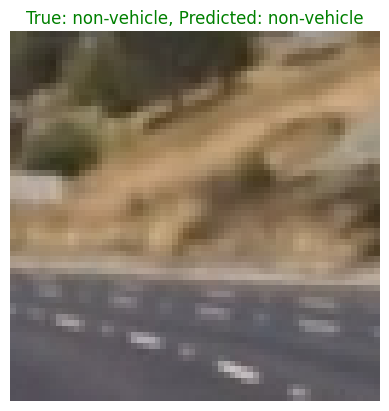

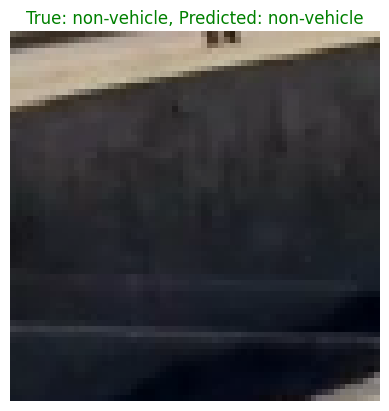

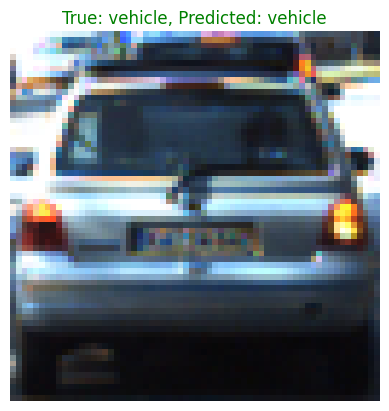

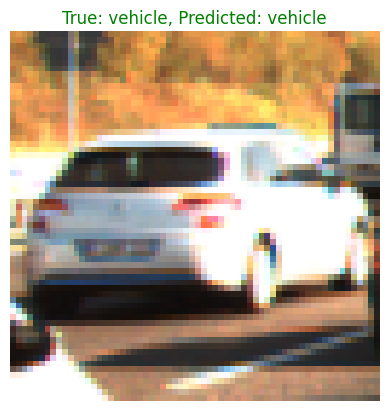

In [15]:
class_labels = {0: 'non-vehicle', 1: 'vehicle'}

# Function to display images with predictions
def visualize_predictions(model, test_data_gen, num_samples=5):
    
    predictions = model.predict(test_data_gen)

    
    true_labels = test_data_gen.classes

   
    class_indices = test_data_gen.class_indices


    filenames = test_data_gen.filenames

   
    sample_indices = np.random.choice(len(filenames), num_samples, replace=False)

    
    for i in sample_indices:
        filename = filenames[i]

        
        true_label = class_labels[true_labels[i]]

       
        predicted_prob = predictions[i]
        predicted_class = int(predicted_prob > 0.5)
        predicted_label = class_labels[predicted_class]

        
        label_color = 'green' if true_label == predicted_label else 'red'

        
        img_path = os.path.join('/kaggle/working/dataset/test/', filename)
        img = plt.imread(img_path)

        plt.imshow(img)
        plt.title(f'True: {true_label}, Predicted: {predicted_label}', color=label_color)
        plt.axis('off')
        plt.show()

visualize_predictions(cnn_model, test_Image, num_samples=5)


In [20]:
Batch_size2 = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],  
    channel_shift_range=50  
)

test_datagen = ImageDataGenerator(rescale=1./255)


test_Image = test_datagen.flow_from_directory(
    '/kaggle/working/dataset/test',
    target_size=(64, 64),
    batch_size=Batch_size1,
    class_mode='binary',
    shuffle=False  
)

train_Image = train_datagen.flow_from_directory(
    '/kaggle/working/dataset/train',
    target_size=(64, 64),
    batch_size=Batch_size1,
    class_mode='binary'
)

Found 3553 images belonging to 2 classes.
Found 14207 images belonging to 2 classes.


In [30]:
from tensorflow.keras.applications import MobileNetV2


base_model= MobileNetV2(weights=None, include_top=False, input_shape=(64, 64, 3))
weights_path = "/kaggle/input/mobilenetv2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5"

base_model.load_weights(weights_path)


for layer in base_model.layers[:-20]:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(1048, activation='relu',kernel_regularizer=l2(0.1)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1048, activation='relu',kernel_regularizer=l2(0.1)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',Precision(),Recall()])
early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=1)

In [31]:
Evaluate2 = model.fit(train_Image, epochs=10, validation_data=test_Image, batch_size=Batch_size2, callbacks=[early_stopping])

Epoch 1/10
444/444 [==============================] - 88s 183ms/step - loss: 86.2531 - accuracy: 0.9255 - precision_2: 0.9327 - recall_2: 0.9157 - val_loss: 11.9882 - val_accuracy: 0.9854 - val_precision_2: 0.9792 - val_recall_2: 0.9915
Epoch 2/10
444/444 [==============================] - 85s 192ms/step - loss: 3.8772 - accuracy: 0.9501 - precision_2: 0.9524 - recall_2: 0.9465 - val_loss: 0.6968 - val_accuracy: 0.9637 - val_precision_2: 0.9340 - val_recall_2: 0.9972
Epoch 3/10
444/444 [==============================] - 86s 194ms/step - loss: 0.3636 - accuracy: 0.9585 - precision_2: 0.9611 - recall_2: 0.9548 - val_loss: 0.1711 - val_accuracy: 0.9809 - val_precision_2: 0.9638 - val_recall_2: 0.9989
Epoch 4/10
444/444 [==============================] - 87s 196ms/step - loss: 0.2115 - accuracy: 0.9606 - precision_2: 0.9635 - recall_2: 0.9566 - val_loss: 0.1184 - val_accuracy: 0.9865 - val_precision_2: 0.9755 - val_recall_2: 0.9977
Epoch 5/10
444/444 [==============================] - 86s 

In [32]:
print("\nClassification Report:")
score, acc, pre, rcl = model.evaluate(test_Image)
print('Test Loss:', score * 100)
print('Test Accuracy:' ,acc * 100)
print('Test Precision:',pre * 100)
print('Test Recall:', rcl * 100)
f1_score=2 * (pre * rcl) / (rcl + rcl)
print('Test F1-Score:' ,f1_score * 100)


Classification Report:
112/112 [==============================] - 7s 61ms/step - loss: 0.1338 - accuracy: 0.9842 - precision_2: 0.9691 - recall_2: 1.0000
Test Loss: 13.382312655448914
Test Accuracy: 98.42386841773987
Test Precision: 96.91460132598877
Test Recall: 100.0
Test F1-Score: 96.91460132598877


112/112 [==============================] - 8s 64ms/step


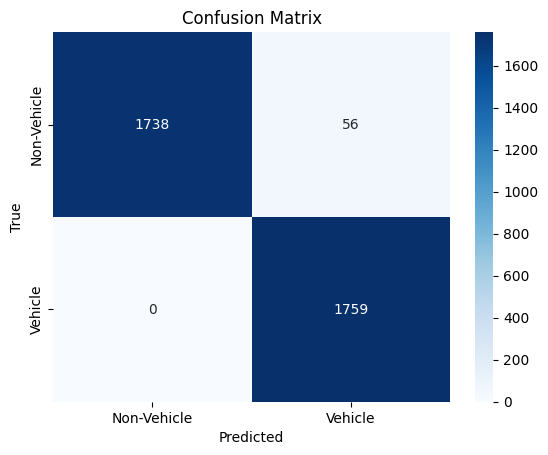

In [33]:

predictions = model.predict(test_Image)


binary_predictions = np.round(predictions)


true_labels = test_Image.classes


conf_matrix = confusion_matrix(true_labels, binary_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Vehicle', 'Vehicle'], yticklabels=['Non-Vehicle', 'Vehicle'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

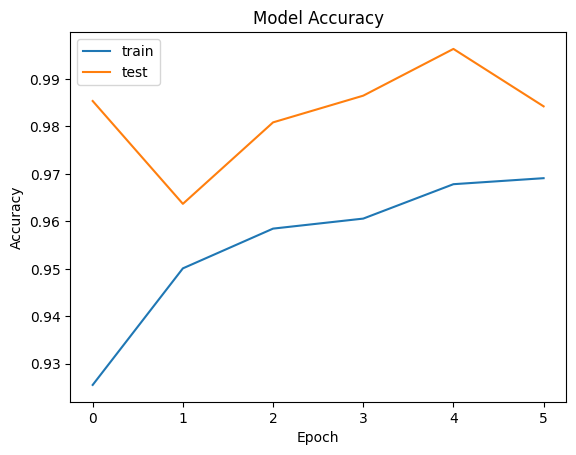

In [37]:

plt.plot(Evaluate2.history[k])
plt.plot(Evaluate2.history['val_'+k])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()





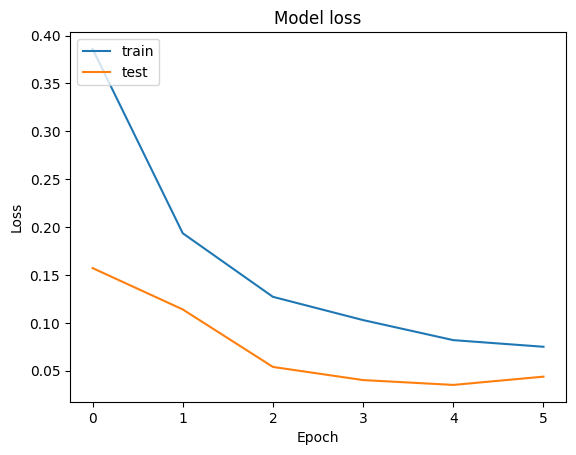

In [35]:
plt.plot(Evaluate1.history['loss'])
plt.plot(Evaluate1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

112/112 [==============================] - 7s 61ms/step


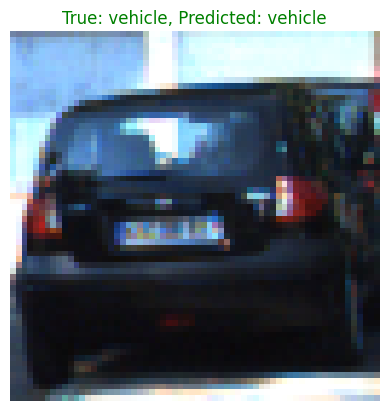

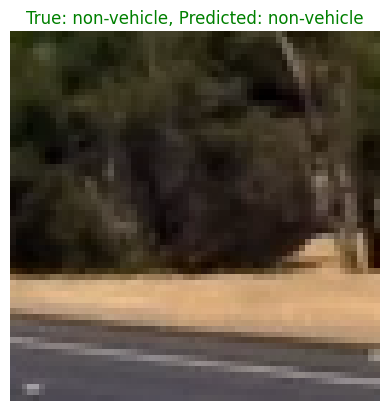

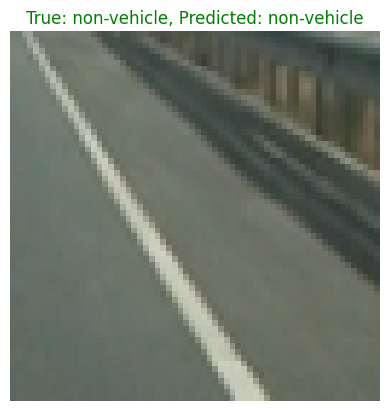

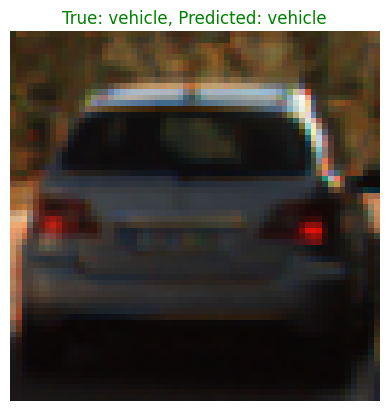

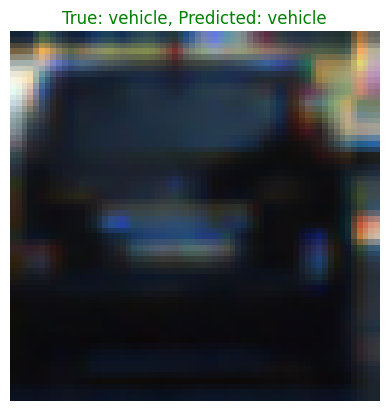

In [36]:
class_labels = {0: 'non-vehicle', 1: 'vehicle'}


def visualize_predictions(model, test_data_gen, num_samples=5):
    
    predictions = model.predict(test_data_gen)

    
    true_labels = test_data_gen.classes

    
    class_indices = test_data_gen.class_indices
    

    filenames = test_data_gen.filenames

    
    sample_indices = np.random.choice(len(filenames), num_samples, replace=False)

   
    for i in sample_indices:
        filename = filenames[i]

        
        true_label = class_labels[true_labels[i]]

        
        predicted_prob = predictions[i]
        predicted_class = int(predicted_prob > 0.5)
        predicted_label = class_labels[predicted_class]

        
        label_color = 'green' if true_label == predicted_label else 'red'

        
        img_path = os.path.join('/kaggle/working/dataset/test/', filename)
        img = plt.imread(img_path)

        plt.imshow(img)
        plt.title(f'True: {true_label}, Predicted: {predicted_label}', color=label_color)
        plt.axis('off')
        plt.show()

visualize_predictions(model, test_Image, num_samples=5)
